In [1]:
#Para essa aplicação de ML serão necessárias as bibliotecas pandas e scikit-learn
#Foi utilizado o modelo de regressão de Ridge para tratar a multicolinearidade entre as variáveis independentes

In [2]:
import pandas as pd

In [3]:
#definir a coluna Date Time como index para facilitar a análise já que se trata de uma aplicação temporal
df = pd.read_csv("C:\ML\jena_climate_2009_2016.csv", index_col="Date Time", parse_dates=True) 

In [4]:
df.head(6)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7


In [5]:
df.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [6]:
# Verificar a quantidade de registros
df.shape

(420551, 14)

In [7]:
# A questão recomenda o uso dos dados horários para a predição da temperatura 'T (degC)'
# Verificar a frequência dos dados do dataset e ajustar para uma freqência horária
# Tentei pelo slice proposto [5::6] mas o dataset apresenta uma frequência inconsistentes e o resultado final não satisfazia (apresentava o horário 01:10 por exemplo nos últimos registros).

In [8]:
# Verificar a freq do index
df.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:30:00', '2016-12-31 22:40:00',
               '2016-12-31 22:50:00', '2016-12-31 23:00:00',
               '2016-12-31 23:10:00', '2016-12-31 23:20:00',
               '2016-12-31 23:30:00', '2016-12-31 23:40:00',
               '2016-12-31 23:50:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=420551, freq=None)

In [9]:
# Remover as 5 primeiras linhas para iniciar o dataset em 2009-01-01 01:00:00 (horário fechado 01:00:00)
df = df.drop(index=df.index[0:5])

In [10]:
# Remover os registros duplicados para ajustar frequência
df.drop_duplicates(inplace= True)

In [11]:
# Ajustar frequência para horário
df = df.asfreq('H')

In [12]:
df.shape

(70128, 14)

In [13]:
#Plotar os dados para visualizar os valores da coluna 'T (degC)'

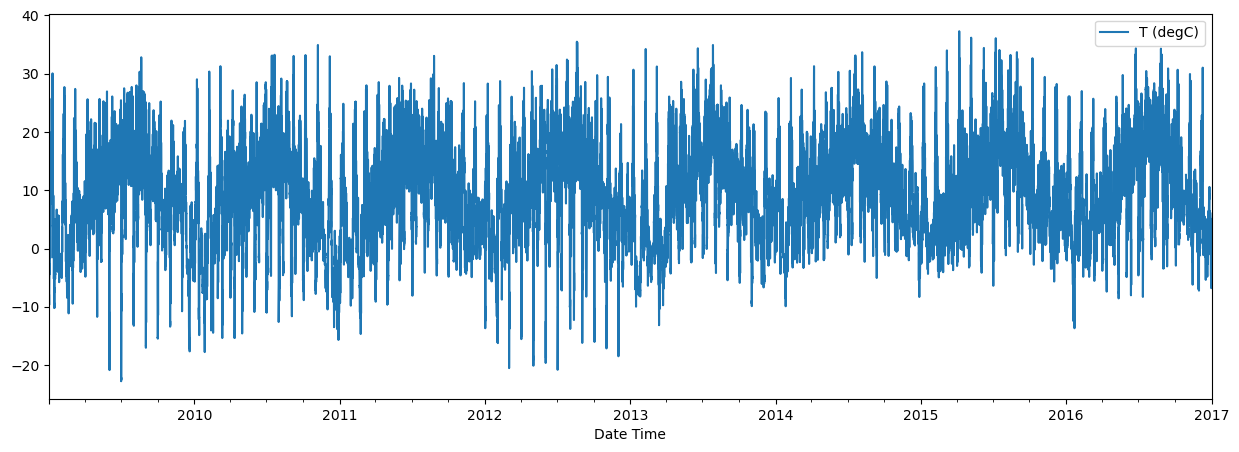

In [14]:
df.plot(figsize= (15,5), y='T (degC)');

In [15]:
# Os dados seguem um padrão sazonal

In [16]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [17]:
df.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2016-12-31 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00
2016-12-31 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
2016-12-31 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15
2016-12-31 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70
2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90


In [18]:
# Certificar que a frequência está como horária. Vemos que freq='H'
df.index

DatetimeIndex(['2009-01-01 01:00:00', '2009-01-01 02:00:00',
               '2009-01-01 03:00:00', '2009-01-01 04:00:00',
               '2009-01-01 05:00:00', '2009-01-01 06:00:00',
               '2009-01-01 07:00:00', '2009-01-01 08:00:00',
               '2009-01-01 09:00:00', '2009-01-01 10:00:00',
               ...
               '2016-12-31 15:00:00', '2016-12-31 16:00:00',
               '2016-12-31 17:00:00', '2016-12-31 18:00:00',
               '2016-12-31 19:00:00', '2016-12-31 20:00:00',
               '2016-12-31 21:00:00', '2016-12-31 22:00:00',
               '2016-12-31 23:00:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=70128, freq='H')

In [19]:
# Criar a coluna de saída (target) para o modelo realizar o aprendizado
# Como o modelo irá prever 2 horas a frente é necessário criar um coluna de saída com os dados da Temperaura de 2 horas depois 
# para ser utilizado como aprendizado
# por exemplo: os dados de 2009-01-01 01:00:00 devem predizer a temperatura às 2009-01-01 03:00:00 (-8.81)

In [20]:
# Criar a coluna de saída T (degC) 2 horas depois utilizando o método .shift(-2)
df['T (degC) 2 horas depois'] = df['T (degC)'].shift(-2)

In [21]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,-8.81
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3,-9.05
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2,-9.63
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0,-9.67
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0,-9.17


In [22]:
df.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2016-12-31 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00,-2.59
2016-12-31 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50,-3.76
2016-12-31 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15,-4.82
2016-12-31 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70,NaN
2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90,NaN


In [23]:
df.shape

(70128, 15)

In [24]:
# As duas ultimas horas do dataset não possuem dados posteriores (NaN). É necessário preencher ou remover esses registros
# Verificar os missing datas de todo o dataframe
df.isnull().sum()

p (mbar)                   91
T (degC)                   91
Tpot (K)                   91
Tdew (degC)                91
rh (%)                     91
VPmax (mbar)               91
VPact (mbar)               91
VPdef (mbar)               91
sh (g/kg)                  91
H2OC (mmol/mol)            91
rho (g/m**3)               91
wv (m/s)                   91
max. wv (m/s)              91
wd (deg)                   91
T (degC) 2 horas depois    93
dtype: int64

In [25]:
# Preencher os missing datas pelo método de ffill forward. 

In [26]:
df.fillna(method="ffill", inplace=True)

In [27]:
df.isnull().sum()

p (mbar)                   0
T (degC)                   0
Tpot (K)                   0
Tdew (degC)                0
rh (%)                     0
VPmax (mbar)               0
VPact (mbar)               0
VPdef (mbar)               0
sh (g/kg)                  0
H2OC (mmol/mol)            0
rho (g/m**3)               0
wv (m/s)                   0
max. wv (m/s)              0
wd (deg)                   0
T (degC) 2 horas depois    0
dtype: int64

In [28]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,-8.81
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3,-9.05
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2,-9.63
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0,-9.67
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0,-9.17


In [29]:
df.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2016-12-31 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00,-2.59
2016-12-31 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50,-3.76
2016-12-31 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15,-4.82
2016-12-31 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70,-4.82
2017-01-01 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90,-4.82


In [30]:
# Criar o conjunto de dados para o treinamento e teste
# Dividir os dados para treinameto (de 01-01-2009 a 31-12-2015) e para teste (01-01-2015 a 31-12-2016)

In [31]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [32]:
train.tail()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2014-12-31 19:00:00,1006.20,2.27,274.94,1.96,97.8,7.19,7.04,0.16,4.36,6.99,1269.29,0.48,1.28,120.3,1.96
2014-12-31 20:00:00,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3,1.94
2014-12-31 21:00:00,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3,2.18
2014-12-31 22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6,2.06
2014-12-31 23:00:00,1007.11,2.18,274.78,2.01,98.8,7.15,7.06,0.09,4.37,7.01,1270.82,0.35,0.86,140.8,2.22


In [33]:
test.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1007.19,2.06,274.65,1.89,98.8,7.09,7.00,0.09,4.34,6.95,1271.51,0.41,0.92,273.8,2.04
2015-01-01 01:00:00,1007.06,2.22,274.82,2.06,98.9,7.17,7.09,0.08,4.39,7.04,1270.58,0.43,0.88,119.1,1.79
2015-01-01 02:00:00,1007.43,2.04,274.61,1.87,98.8,7.08,6.99,0.08,4.33,6.94,1271.93,0.86,1.64,145.9,2.12
2015-01-01 03:00:00,1007.87,1.79,274.34,1.63,98.8,6.95,6.87,0.08,4.25,6.82,1273.66,0.82,1.72,140.6,2.46
2015-01-01 04:00:00,1007.79,2.12,274.66,1.99,99.1,7.12,7.05,0.06,4.36,7.00,1271.98,0.43,1.04,86.2,1.93


In [34]:
# Selecionar as colunas que servirão como features (preditores) e target (predição) do modelo

In [35]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'T (degC) 2 horas depois'],
      dtype='object')

In [36]:
FEATURES = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']

In [37]:
TARGET = 'T (degC) 2 horas depois'

In [38]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [39]:
# Importar o módulo Ridge da biblioteca de ML scikit-learn

In [40]:
from sklearn.linear_model import Ridge

In [41]:
# Instanciar o objeto (modelo de regressão) com alpha = 0.1

In [42]:
reg = Ridge(alpha=0.1)

In [43]:
# Gerar o modelo de predição

In [44]:
reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [45]:
# Gerar as predições (predict) pelo modelo reg utilzando o conjunto de teste

In [46]:
predic = reg.predict(X_test)

In [47]:
# transformar em Pandas Series para facilitar análise posterior
predic = pd.Series(predic, index=y_test.index)

<AxesSubplot: xlabel='Date Time'>

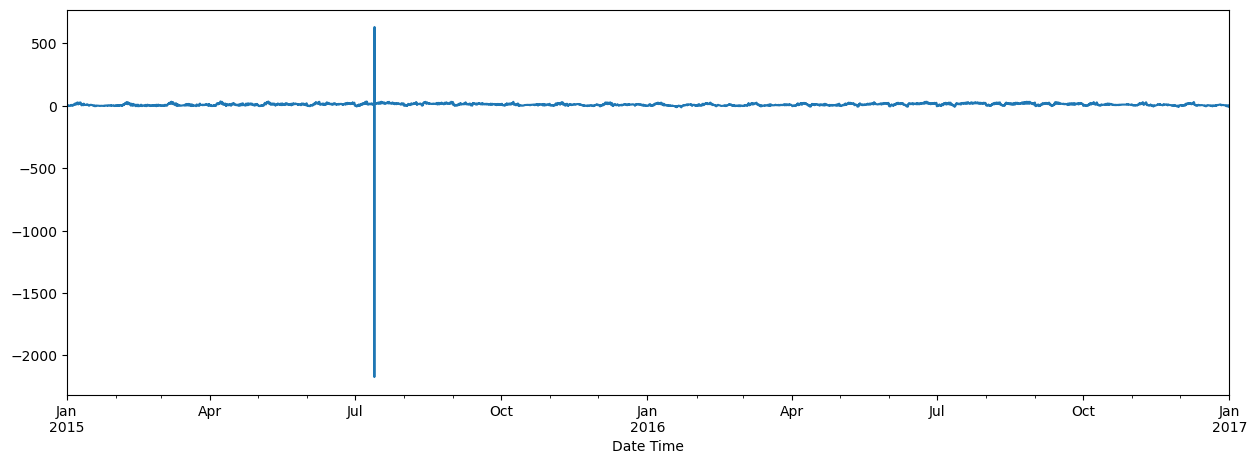

In [48]:
# Visualizar as predições para análise
predic.plot(figsize=(15,5))

In [49]:
# Nota-se alguns valores outliers de predição (não esperados)

In [50]:
# Verificar os maiores valores preditos
predic.nlargest()

Date Time
2015-07-13 12:00:00    630.967606
2015-07-13 11:00:00    630.963706
2015-07-13 10:00:00    630.375115
2015-04-07 16:00:00     35.632611
2015-04-07 15:00:00     34.658692
dtype: float64

In [51]:
# Nota-se valores outliers nos resgistros em torno das datas 2015-07-13 10:00:00 a 2015-07-13 12:00:00
# Verificar as vizinhanças para análise

In [52]:
df.loc[(df.index >= '2015-07-13 08:00:00') & (df.index <= '2015-07-13 14:00:00')]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2015-07-13 08:00:00,990.40,16.46,290.42,12.64,78.10,18.75,14.65,4.11,9.25,14.79,1184.61,2.56,4.24,244.7,17.98
2015-07-13 09:00:00,990.52,16.98,290.93,12.94,77.10,19.38,14.94,4.44,9.44,15.09,1182.50,6.16,-9999.00,289.6,18.71
2015-07-13 10:00:00,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.00,-9999.00,359.8,18.75
2015-07-13 11:00:00,990.16,18.71,292.70,12.48,67.07,21.61,14.50,7.12,9.16,14.64,1175.26,-9999.00,-9999.00,359.8,18.89
2015-07-13 12:00:00,990.15,18.75,292.74,12.27,65.97,21.67,14.29,7.37,9.03,14.44,1175.18,-9999.00,-9999.00,359.8,19.64
2015-07-13 13:00:00,989.84,18.89,292.90,12.59,66.81,21.86,14.60,7.25,9.23,14.75,1174.11,4.45,8.53,225.1,19.37
2015-07-13 14:00:00,989.56,19.64,293.68,12.35,62.74,22.90,14.37,8.53,9.08,14.52,1170.87,2.77,5.54,236.8,16.96


In [53]:
# Nota-se valores incorretos nas colunas 'wv (m/s)' e 'max. wv (m/s)'

In [54]:
# verificar em todo o dataframe
df.loc[df['wv (m/s)'] < 0]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2015-07-13 10:00:00,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.0,-9999.0,359.8,18.75
2015-07-13 11:00:00,990.16,18.71,292.70,12.48,67.07,21.61,14.50,7.12,9.16,14.64,1175.26,-9999.0,-9999.0,359.8,18.89
2015-07-13 12:00:00,990.15,18.75,292.74,12.27,65.97,21.67,14.29,7.37,9.03,14.44,1175.18,-9999.0,-9999.0,359.8,19.64


In [55]:
df.loc[df['max. wv (m/s)'] < 0]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),T (degC) 2 horas depois
Date Time,,,,,,,,,,,,,,,
2015-07-13 09:00:00,990.52,16.98,290.93,12.94,77.10,19.38,14.94,4.44,9.44,15.09,1182.50,6.16,-9999.0,289.6,18.71
2015-07-13 10:00:00,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.00,-9999.0,359.8,18.75
2015-07-13 11:00:00,990.16,18.71,292.70,12.48,67.07,21.61,14.50,7.12,9.16,14.64,1175.26,-9999.00,-9999.0,359.8,18.89
2015-07-13 12:00:00,990.15,18.75,292.74,12.27,65.97,21.67,14.29,7.37,9.03,14.44,1175.18,-9999.00,-9999.0,359.8,19.64


In [56]:
# Verificar os menores valores preditos

In [57]:
predic.nsmallest()

Date Time
2015-07-13 09:00:00   -2173.448596
2016-01-22 09:00:00     -12.741133
2016-01-22 07:00:00     -12.598936
2016-01-22 06:00:00     -12.395373
2016-01-22 08:00:00     -12.365727
dtype: float64

In [58]:
# Os valores incorretos se concentram nos registos '2015-07-13 09:00:00', '2015-07-13 10:00:00', '2015-07-13 11:00:00', '2015-07-13 12:00:00'

In [59]:
# Criar um dataframe com os valores reais (y_test) e as predições (predic)

In [60]:
results = pd.concat([y_test, predic], axis = 1)

In [61]:
# Remover os quatro registros com valores outliers
results.drop(['2015-07-13 09:00:00', '2015-07-13 10:00:00', '2015-07-13 11:00:00', '2015-07-13 12:00:00'], inplace = True)

In [62]:
# Renomear as colunas para facilitar a análise
results.columns = ['T (degC) 2 horas depois', 'Predic']

In [63]:
# Importar o métrico de avaliação do modelo Erro Médio Absoluto (mae - diferença média entre as previsões e valores reais)
# Usar esse método pois o interesse está em comparar o valor absoluto da Temperatura Real e Previsto
# O erro quadrático média irá sofrer o efeito das diferenças maiores elevada ao quadrado o que em termos práticos na avaliação da temperatura não tem muito significado
from sklearn.metrics import mean_absolute_error

In [64]:
mean_absolute_error(predic, y_test)

1.6957013714227174

In [65]:
# Um erro médio de 1.69 Graus Celsius não é relevante na prática o que demonstra um bom resultado do modelo

<AxesSubplot: xlabel='Date Time'>

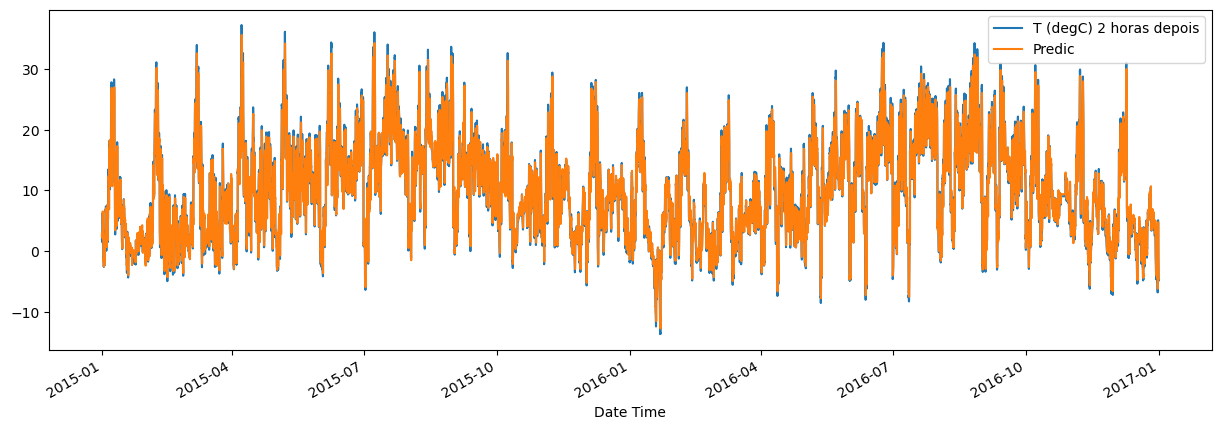

In [66]:
# Visualisar os valores das temperaturas reais X predições ao longo do dataset de teste

results.plot(figsize= (15,5))


In [67]:
# Nota-se uma boa aderência dos valores

In [68]:
# Variar o alpha para analisar se existe melhora no modelo
# alpha = 10.0

In [69]:
reg1 = Ridge(alpha=10.0)

In [70]:
reg1.fit(X_train, y_train)

Ridge(alpha=10.0)

In [71]:
predic1 = reg1.predict(X_test)

In [72]:
predic1 = pd.Series(predic1, index=y_test.index)

In [73]:
mean_absolute_error(predic1, y_test)

1.6986276419297364

In [74]:
# A alteração do valor de alpha aumentou o erro absoluto médio (mae) de 1.6957 para 1.6986 (não signifacativo).